# **Importing Libraries**

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
import missingno as msno

# Loading the data



In [366]:
data = pd.read_csv('/content/Credit Card Defaulter Prediction.csv')

In [367]:
print("Shape of our dataset:",data.shape)

Shape of our dataset: (30000, 25)


In [368]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [369]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y
29999,30000,50000,M,University,Married,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,Y


# **Data Cleaning and Preprocessing**

In [370]:
df1 = data.copy()
print(df1.shape)

(30000, 25)


In [371]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')

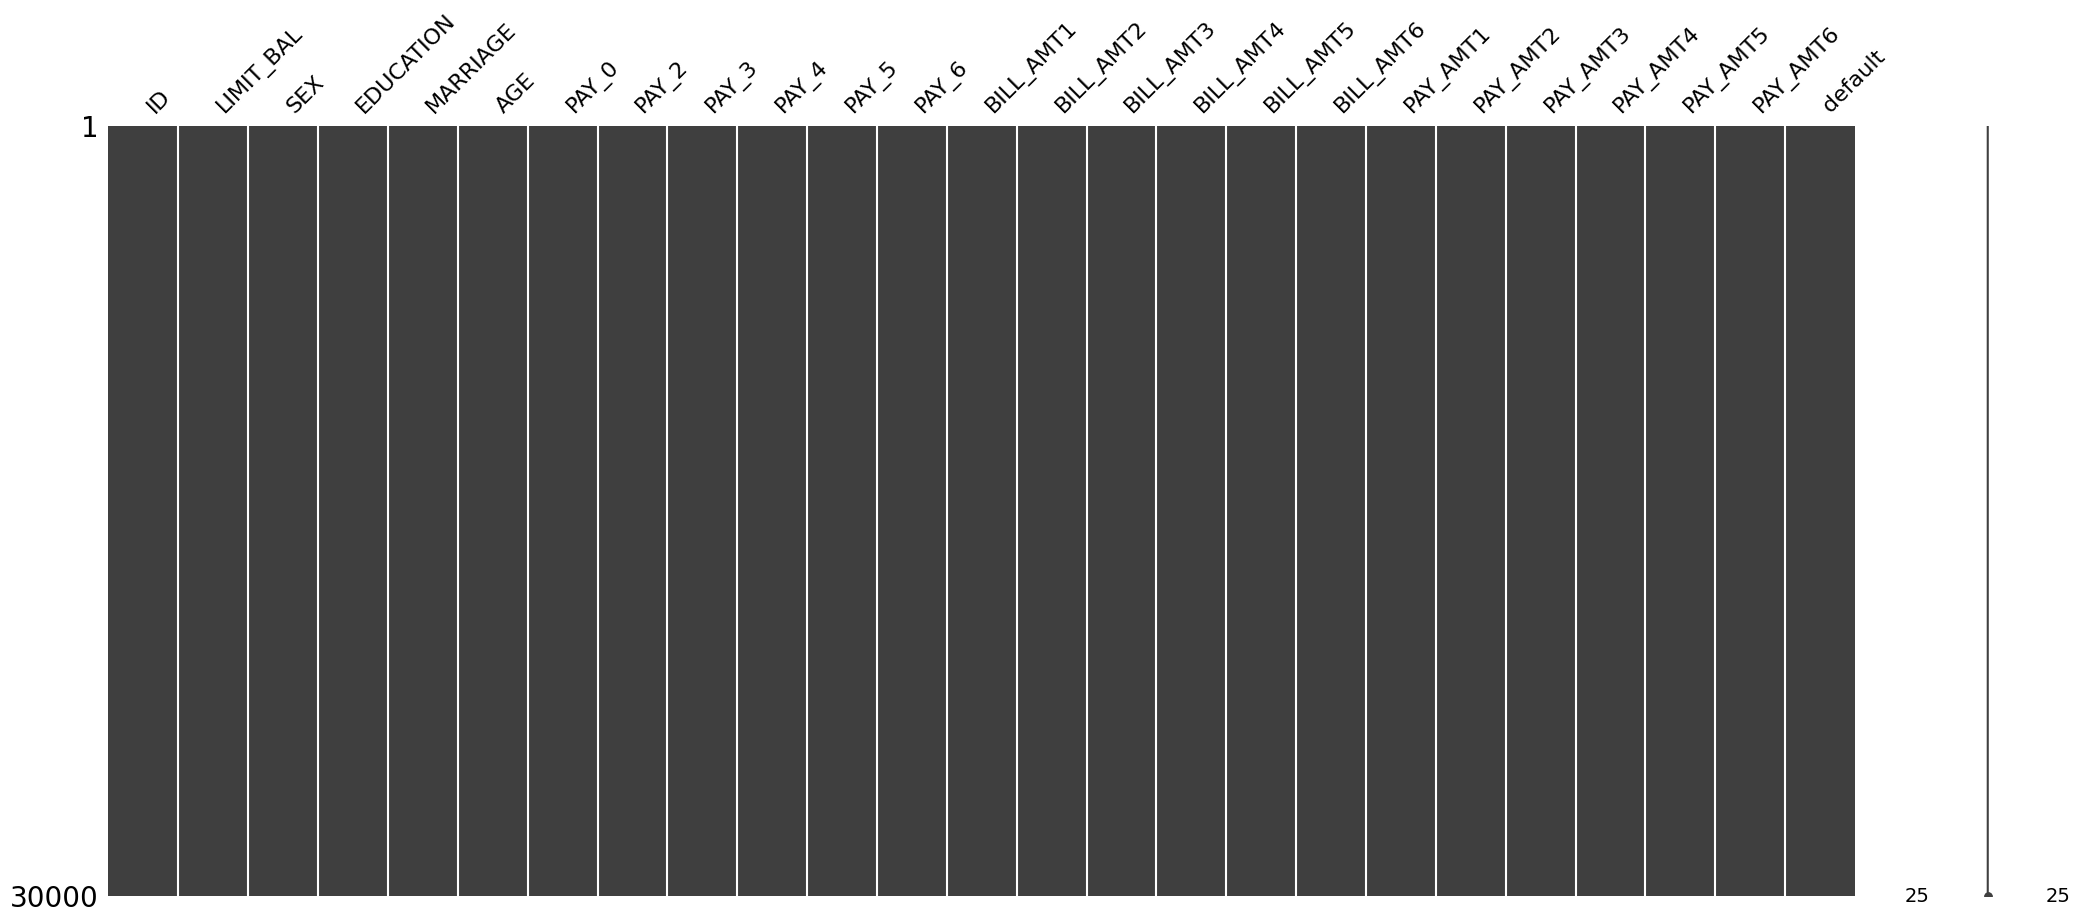

<Figure size 1000x600 with 0 Axes>

In [372]:
sorted_df1 = df1.sort_values(by='AGE')
msno.matrix(sorted_df1)

plt.figure(figsize=(10, 6))
plt.show()

In [373]:
df1.dropna(inplace=True)

In [374]:
df1.rename(columns={'default ':'def_pay'}, inplace=True)
df1.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [375]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_1      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [376]:
education_counts = df1['EDUCATION'].value_counts()
print(education_counts)

EDUCATION
University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: count, dtype: int64


In [377]:
# Replace unexpected values with 'Unknown'
df1['EDUCATION'] = df1['EDUCATION'].replace({'0': 'Unknown', '19272': 'Unknown'})

In [378]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the 'EDUCATION' column
df1['EDUCATION'] = label_encoder.fit_transform(df1['EDUCATION'])
print(df1['EDUCATION'].unique())

[3 0 1 4 2]


In [379]:
sex_counts = df1['SEX'].value_counts()
print(sex_counts)

SEX
F    18112
M    11888
Name: count, dtype: int64


In [380]:
# Replace unexpected value with 'Unknown'
df1['SEX'] = df1['SEX'].replace({'2482': 'M'})

In [381]:
# Fit label encoder and transform the 'SEX' column
df1['SEX'] = label_encoder.fit_transform(df1['SEX'])
print(df1['SEX'].unique())

[0 1]


In [382]:
marriage_counts = df1['MARRIAGE'].value_counts()
print(marriage_counts)

MARRIAGE
Single     15964
Married    13659
Other        323
0             54
Name: count, dtype: int64


In [383]:
# Replace 'Married' with 1 and 'Single' with 0 in the 'MARRIAGE' column
df1['MARRIAGE'] = df1['MARRIAGE'].replace({'0': 'Other', '22388': 'Other'})

In [384]:
# Fit label encoder and transform the 'MARRIAGE' column
df1['MARRIAGE'] = label_encoder.fit_transform(df1['MARRIAGE'])
print(df1['MARRIAGE'].unique())

[0 2 1]


In [385]:
default_counts = df1['def_pay'].value_counts()
print(default_counts)

def_pay
N    23364
Y     6636
Name: count, dtype: int64


In [386]:
# Fit label encoder and transform the 'def_pay' column
df1['def_pay'] = label_encoder.fit_transform(df1['def_pay'])
print(df1['def_pay'].unique())

[1 0]


In [387]:
# Convert 'SEX' column to categorical
df1['SEX'] = df1['SEX'].astype('category')

# Convert 'EDUCATION' column to categorical
df1['EDUCATION'] = df1['EDUCATION'].astype('category')

# Convert 'MARRIAGE' column to categorical
df1['MARRIAGE'] = df1['MARRIAGE'].astype('category')

# Convert 'default' column to categorical (assuming it's the target variable)
df1['def_pay'] = df1['def_pay'].astype('category')

# Convert 'BILL_AMT2' column to numeric
df1['BILL_AMT2'] = pd.to_numeric(df1['BILL_AMT2'], errors='coerce')

# Now check the data types again
for i in range(1,7):
    df1[f'PAY_{i}'] = df1[f'PAY_{i}'].astype('category')

In [388]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  int64   
 2   SEX        30000 non-null  category
 3   EDUCATION  30000 non-null  category
 4   MARRIAGE   30000 non-null  category
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  category
 7   PAY_2      30000 non-null  category
 8   PAY_3      30000 non-null  category
 9   PAY_4      30000 non-null  category
 10  PAY_5      30000 non-null  category
 11  PAY_6      30000 non-null  category
 12  BILL_AMT1  30000 non-null  int64   
 13  BILL_AMT2  30000 non-null  int64   
 14  BILL_AMT3  30000 non-null  int64   
 15  BILL_AMT4  30000 non-null  int64   
 16  BILL_AMT5  30000 non-null  int64   
 17  BILL_AMT6  30000 non-null  int64   
 18  PAY_AMT1   30000 non-null  int64   
 19  PAY_AMT2   30000 non-null

In [389]:
df1.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

 #.This is to check the age range

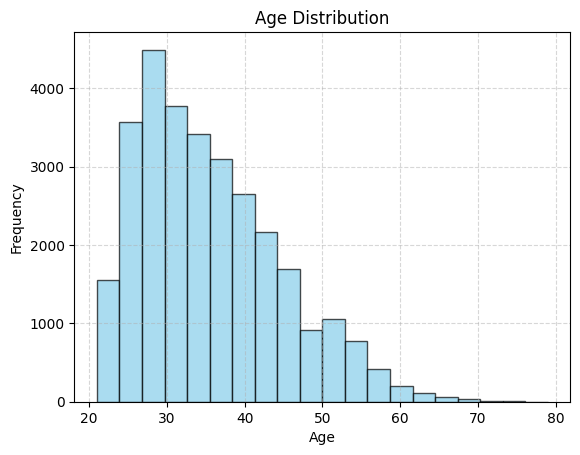

In [390]:
plt.hist(df1['AGE'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add title and labels
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# **Exploratory Data Analysis**

In [391]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,0,3,0,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,3,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,3,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,3,0,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,3,0,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [392]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0


 #Dependent Variable:

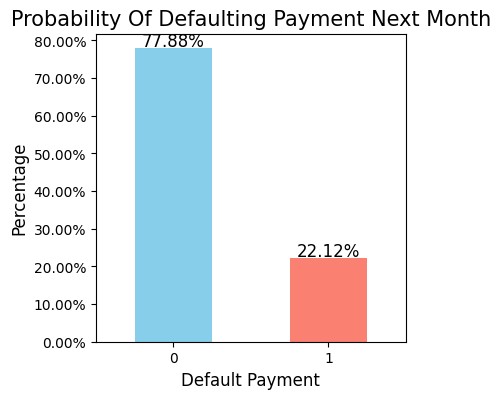

In [393]:
def_cnt = df1['def_pay'].value_counts(normalize=True) * 100

ax = def_cnt.plot(kind='bar', figsize=(4, 4), color=['skyblue', 'salmon'])

ax.set_xlabel("Default Payment", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.set_title("Probability Of Defaulting Payment Next Month", fontsize=15)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}%'))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=0)
plt.show()


We can see that the dataset consists of more than 77% clients are not expected to default payment whereas almost 23% clients are expected to default the payment.

 #Independent Variable:

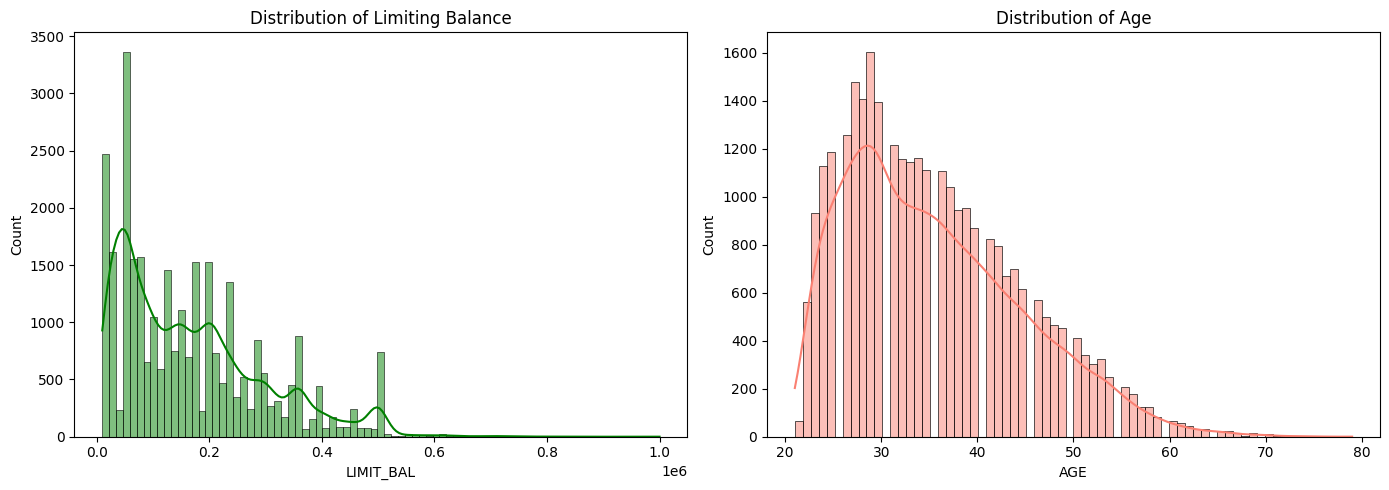

In [394]:
plt.figure(figsize=(14, 5))

# Create subplots
plt.subplot(121)
sns.histplot(df1['LIMIT_BAL'], kde=True, color='green')
plt.title('Distribution of Limiting Balance')

plt.subplot(122)
sns.histplot(df1['AGE'], kde=True, color='salmon')
plt.title('Distribution of Age')

# Show the plot
plt.tight_layout()
plt.show()

After plotting the continuous variables, we observe that the dataset contains skewed distributions for the limiting balance and age of clients.
- The majority of clients have a limiting balance between 0 and 200,000 currency units.
- The age distribution shows a peak in the age bracket of 20 to 40, indicating that the dataset predominantly consists of young to middle-aged clients.

Next, we'll examine the relationship between the variables and the target variable.

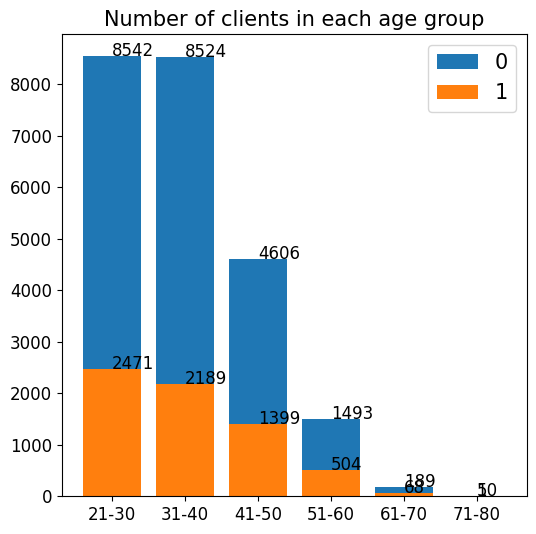

In [395]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df1['AGE_BIN'] = pd.cut(x=df1.AGE, bins=bins, labels=names, right=True)

age_cnt = df1.AGE_BIN.value_counts()
age_0 = (df1.AGE_BIN[df1['def_pay'] == 0].value_counts())
age_1 = (df1.AGE_BIN[df1['def_pay'] == 1].value_counts())

plt.subplots(figsize=(6,6))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

Based on the age distribution of clients in the dataset, we observe that the highest number of clients falls within the 21-30 age group, followed by the 31-40 age group. This indicates that the number of clients likely to default on their payment next month decreases with increasing age. Therefore, age appears to be an important feature for predicting the likelihood of default payment next month.

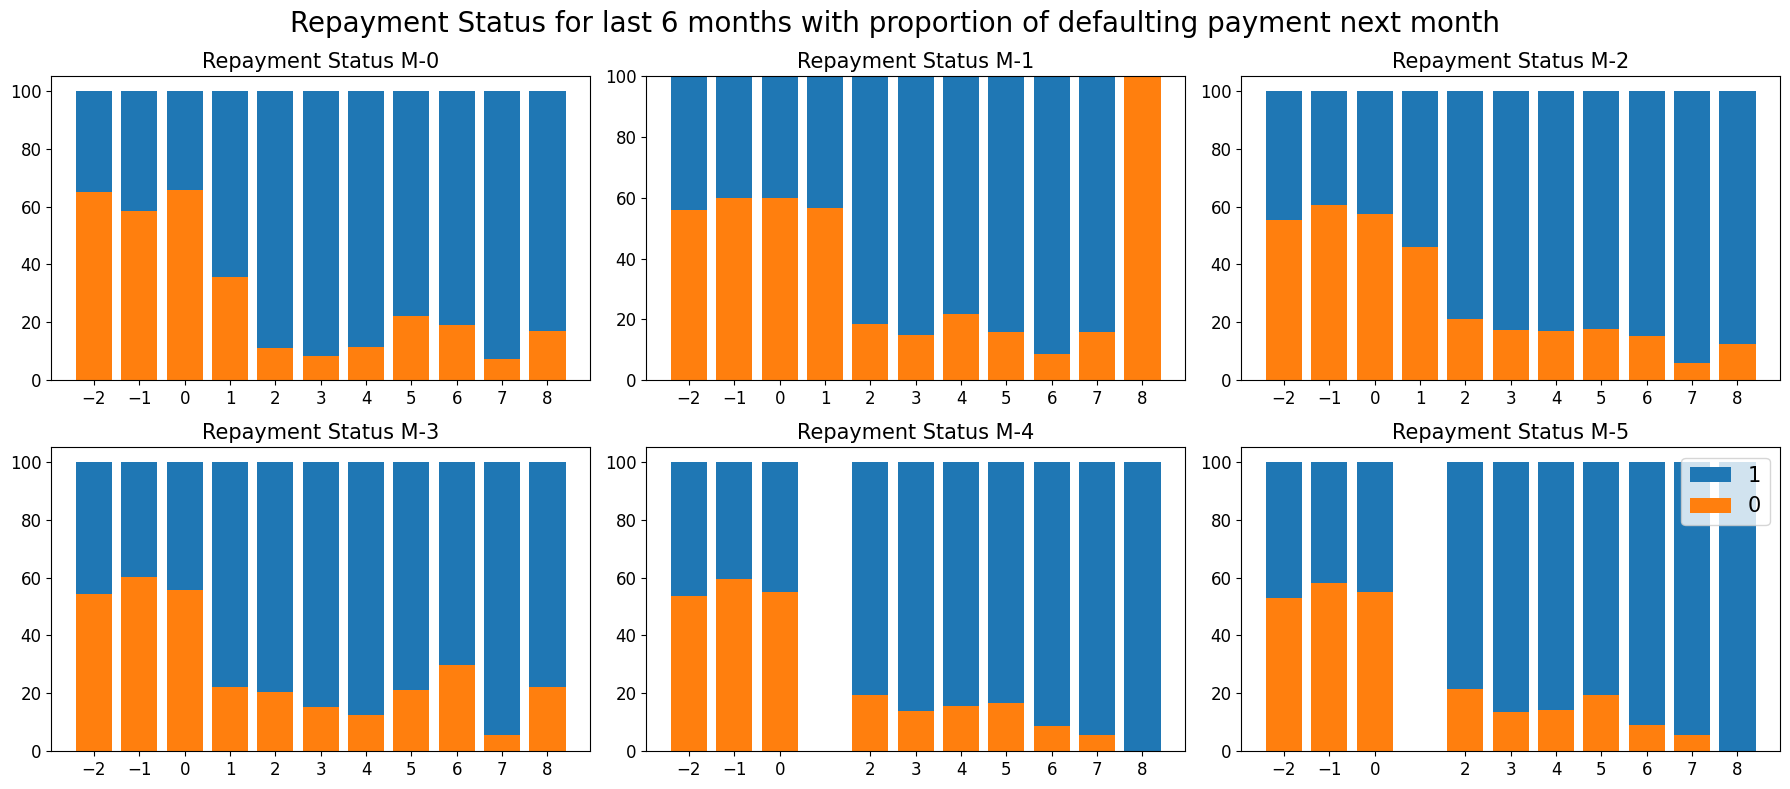

In [396]:
plt.figure(figsize=(18, 8))

pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for i, column in enumerate(pay_columns, start=1):
    pay_0 = df1[df1['def_pay'] == 0][column].value_counts(normalize=True)
    pay_1 = df1[df1['def_pay'] == 1][column].value_counts(normalize=True)
    total = pay_0.add(pay_1, fill_value=0)
    pay_0_prop = pay_0.div(total) * 100
    pay_1_prop = pay_1.div(total) * 100

    # Plot the bar chart for each PAY_X column
    plt.subplot(2, 3, i)
    plt.bar(pay_0_prop.index, pay_1_prop, bottom=pay_0_prop, label='1')
    plt.bar(pay_0_prop.index, pay_0_prop, label='0')
    plt.title(f"Repayment Status M-{i-1}", fontsize=15)
    plt.xticks(sorted(df1[column].unique()), fontsize=12)
    plt.yticks(fontsize=12)

plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.tight_layout()
plt.show()

Above plot shows us the proportion of clients that will default payment next month based on repayment history.
For Current month status, the earlier the payment is made lesser are the chances of those clients defaulting the payment.

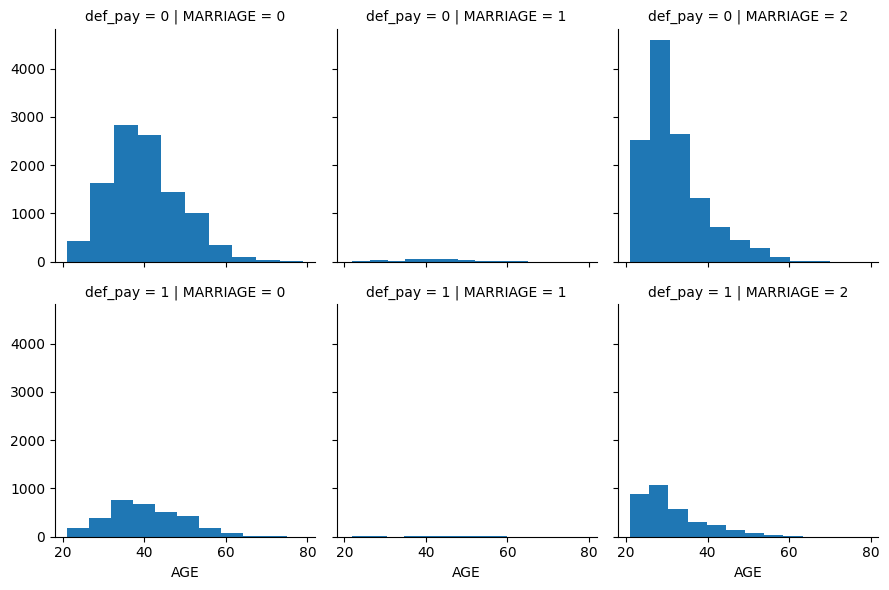

In [397]:
get = sns.FacetGrid(df1, row='def_pay', col='MARRIAGE')
g = get.map(plt.hist, 'AGE')
plt.show()

Based on the above plot, we can infer that married individuals aged between 30 and 50, as well as unmarried clients aged 20-30, tend to default on their payments, with unmarried clients having a higher probability of default. Therefore, including the 'MARRIAGE' feature of clients could help in predicting the probability of defaulting on the payment next month.

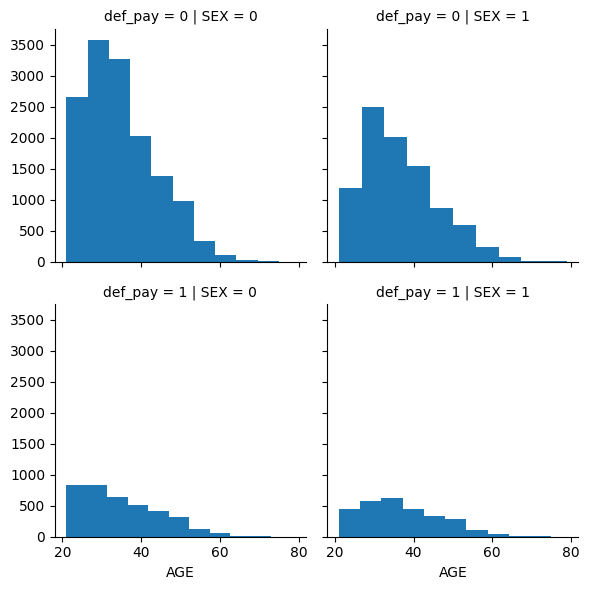

In [398]:
g = sns.FacetGrid(df1, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets.As well as the females are doing payment with credit card more than the males. Hence the SEX column of clients is good to predict probability of defaulting payment.

<ipython-input-399-bdba9e7363b1>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


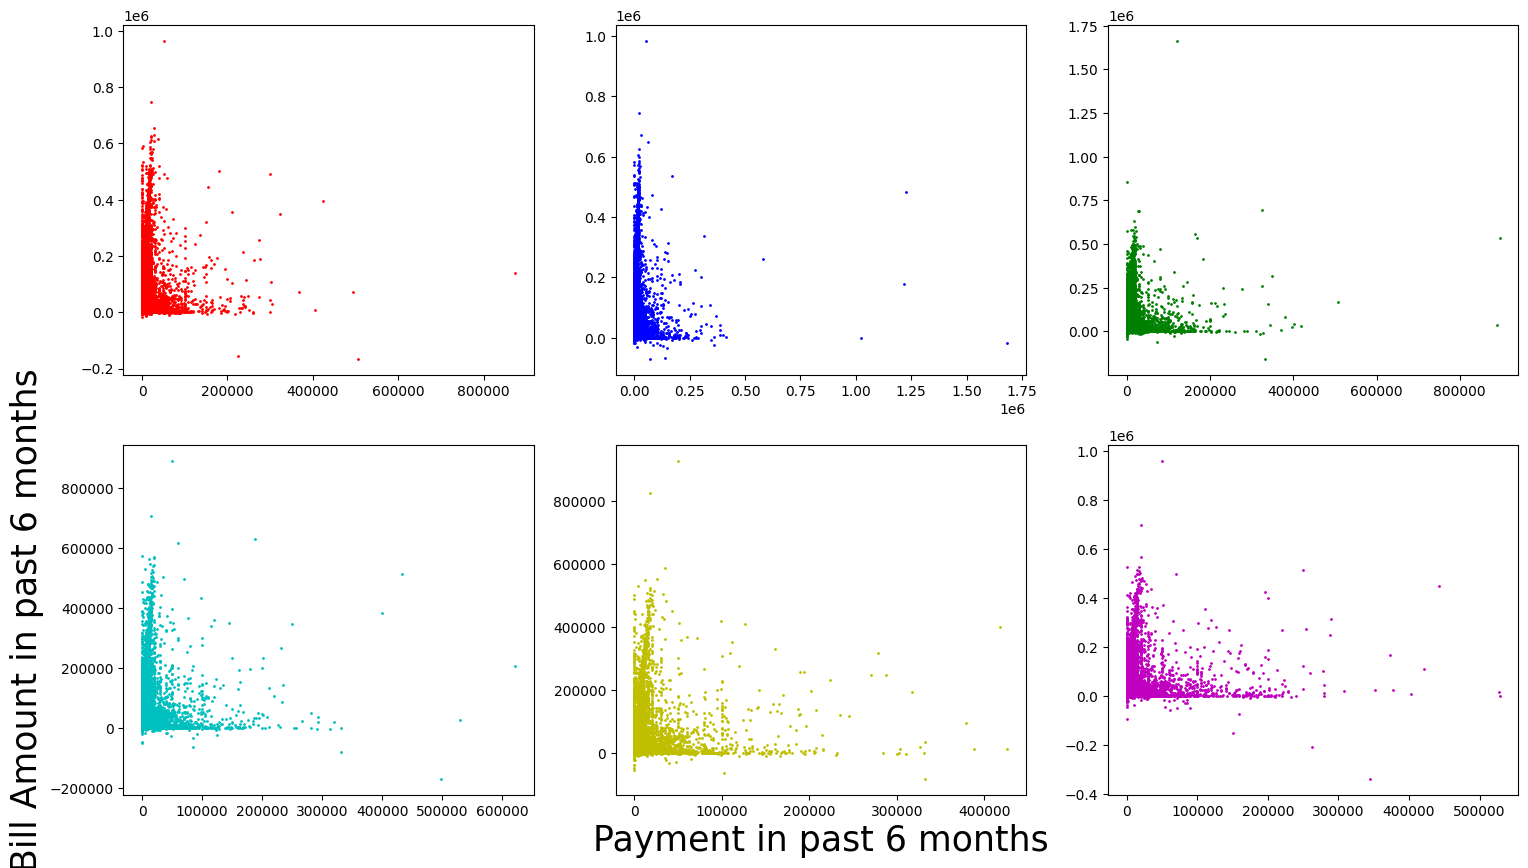

In [399]:
plt.subplots(figsize=(18,10))

plt.subplot(231)
plt.scatter(x=df1.PAY_AMT1, y=df1.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df1.PAY_AMT2, y=df1.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df1.PAY_AMT3, y=df1.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df1.PAY_AMT4, y=df1.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df1.PAY_AMT5, y=df1.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df1.PAY_AMT6, y=df1.BILL_AMT6, c='m', s=1)

plt.show()

The plot above suggests a significant trend: there's a notable proportion of clients whose bill amounts are relatively high, yet their corresponding payment amounts are disproportionately low. This inference is drawn from observing that the majority of data points cluster densely along the Y-axis, particularly near the origin (0) on the X-axis. This concentration indicates that while bills are often substantial, payments made against them tend to be minimal.

In [400]:
df1.drop(columns=['AGE_BIN'], inplace=True)

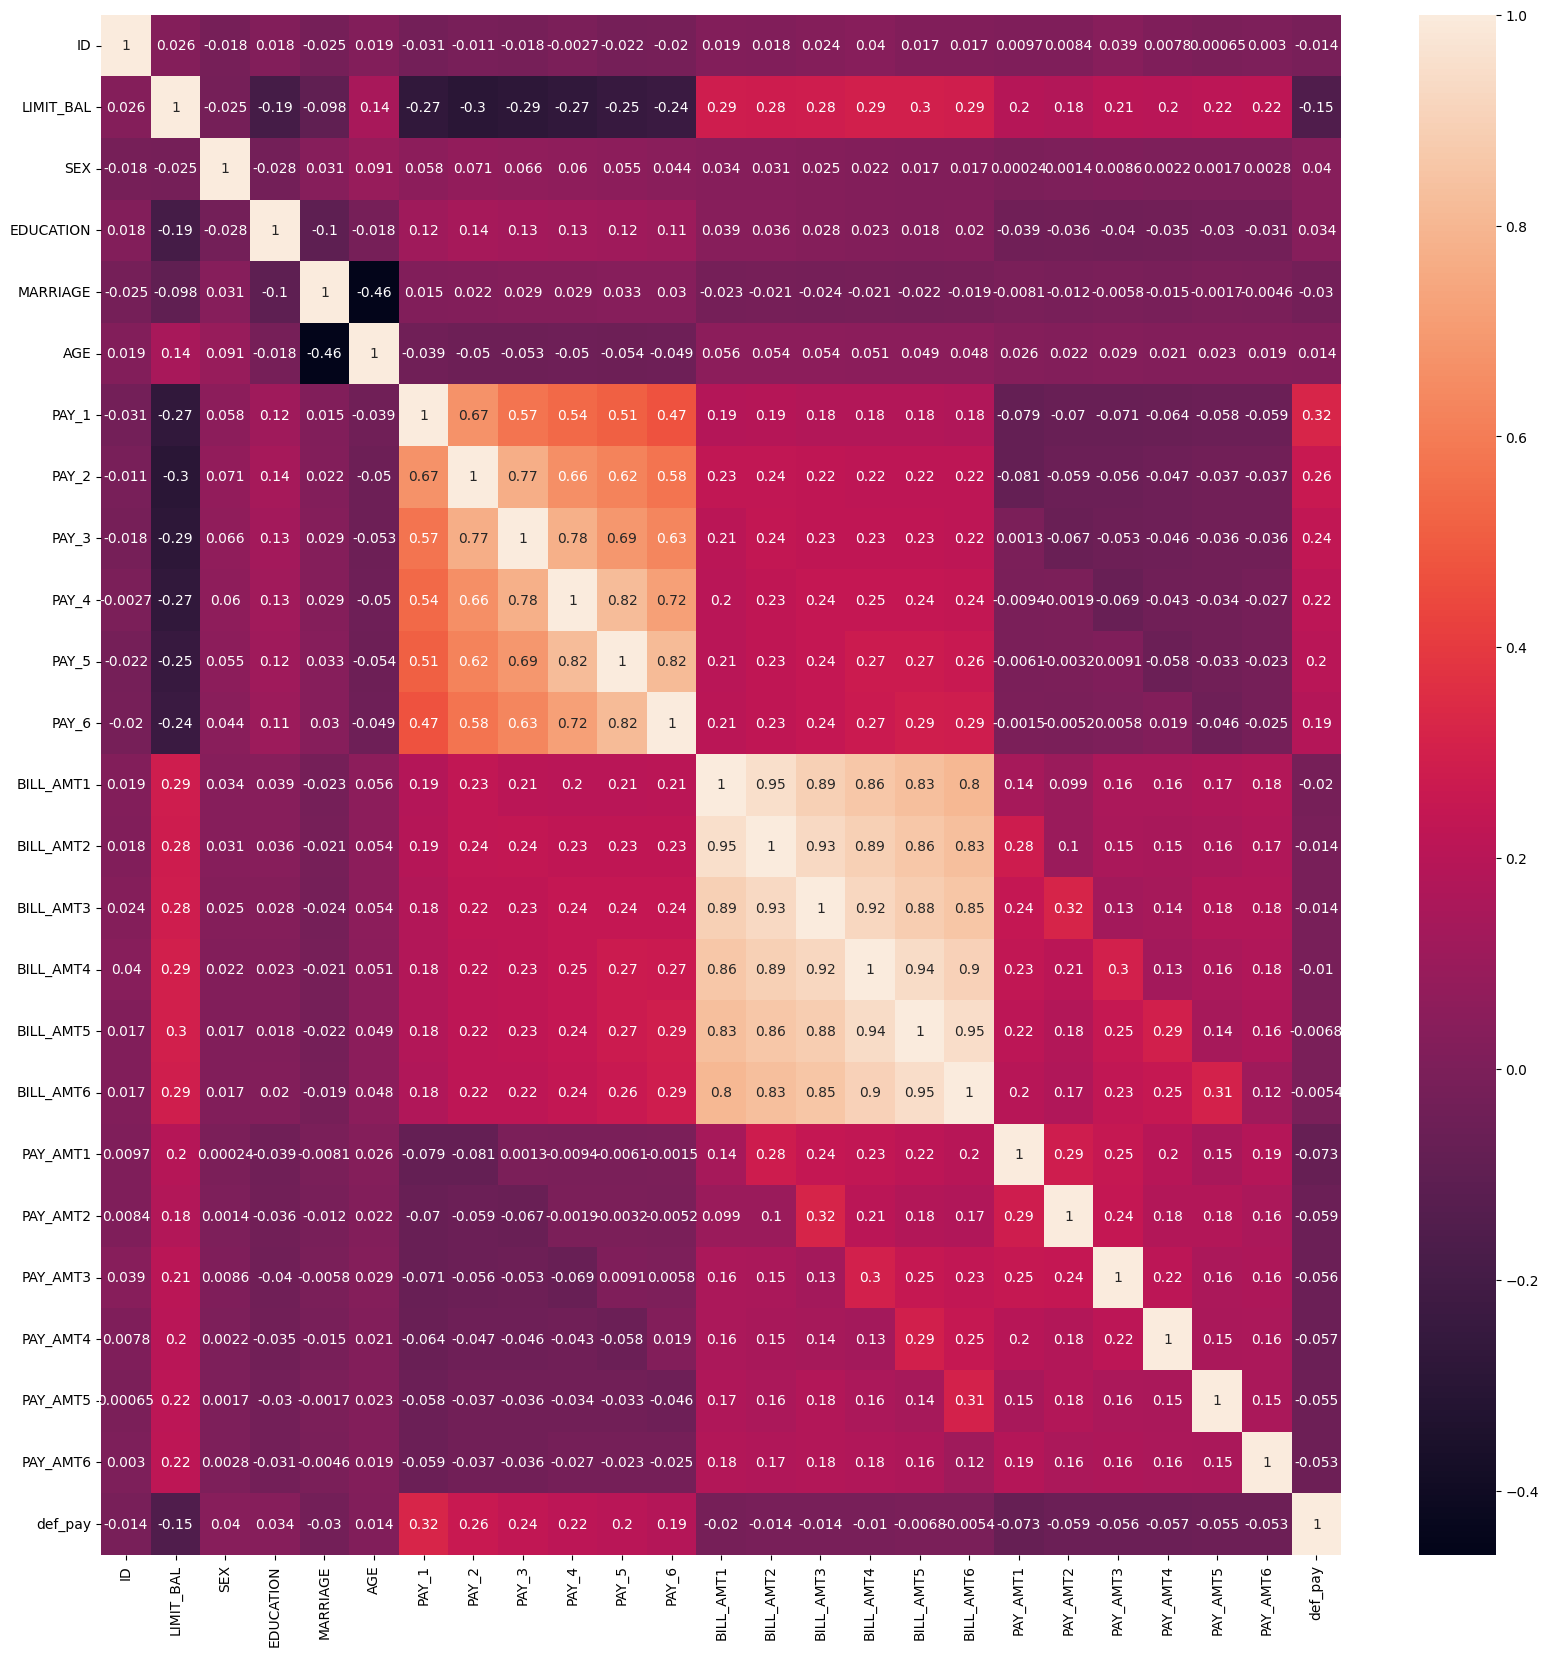

In [401]:
plt.subplots(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True)
plt.show()

The prediction of next month's default appears to rely heavily on the repayment status spanning the past six months across all the provided features. However, there exists multicollinearity among these repayment status features.

Our approach involves initially training the model with all the features and subsequently identifying and eliminating non-essential features in an effort to mitigate multicollinearity.

#Feature extraction

 #.As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)

In [402]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(df1.iloc[:,0:-1], df1['def_pay'])

print('Original dataset shape', len(df1))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [403]:
balance_df = pd.DataFrame(x_smote, columns=df1.columns[:-1])


In [404]:
balance_df['def_pay'] = y_smote

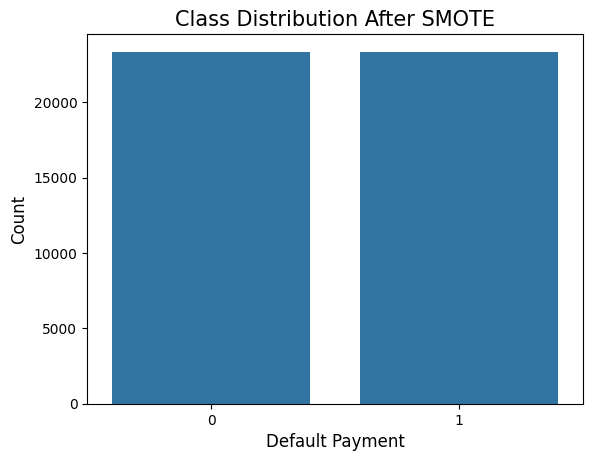

In [406]:
sns.countplot(x='def_pay', data=balance_df)
plt.title("Class Distribution After SMOTE", fontsize=15)
plt.xlabel("Default Payment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [407]:
balance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46728 entries, 0 to 46727
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         46728 non-null  int64   
 1   LIMIT_BAL  46728 non-null  int64   
 2   SEX        46728 non-null  category
 3   EDUCATION  46728 non-null  category
 4   MARRIAGE   46728 non-null  category
 5   AGE        46728 non-null  int64   
 6   PAY_1      46728 non-null  category
 7   PAY_2      46728 non-null  category
 8   PAY_3      46728 non-null  category
 9   PAY_4      46728 non-null  category
 10  PAY_5      44694 non-null  category
 11  PAY_6      44796 non-null  category
 12  BILL_AMT1  46728 non-null  int64   
 13  BILL_AMT2  46728 non-null  int64   
 14  BILL_AMT3  46728 non-null  int64   
 15  BILL_AMT4  46728 non-null  int64   
 16  BILL_AMT5  46728 non-null  int64   
 17  BILL_AMT6  46728 non-null  int64   
 18  PAY_AMT1   46728 non-null  int64   
 19  PAY_AMT2   46728 non-null

In [408]:
balance_df.isnull().sum()

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5        2034
PAY_6        1932
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
def_pay         0
dtype: int64

In [409]:
categorical_columns = balance_df.select_dtypes(include=['category']).columns
balance_df[categorical_columns] = balance_df[categorical_columns].fillna(balance_df[categorical_columns].mode().iloc[0])

In [410]:
balance_df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

In [411]:
#split dataset in features and target variable
feature_columns = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
z = balance_df.drop('ID', axis=1)
X = z.drop('def_pay', axis=1)#[feature_columns] # Features
Y = balance_df.def_pay

In [412]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,0,3,0,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,0,3,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,3,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,3,0,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,3,0,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


 #.Dataset spliting

In [413]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [415]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **DecisionTreeClassifier**

In [417]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
classifer = DecisionTreeClassifier()
classifer.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [418]:
Y_Predicted = classifer.predict(X_test_scaled)
dt_acc = metrics.accuracy_score(Y_test, Y_Predicted)
dt_prec = metrics.precision_score(Y_test, Y_Predicted)
dt_rec = metrics.recall_score(Y_test, Y_Predicted)
print("Accuracy:", dt_acc)
print("Precision:", dt_prec)
print("Recall:", dt_rec)

Accuracy: 0.7693844068763821
Precision: 0.7618320610687023
Recall: 0.7834713103054525


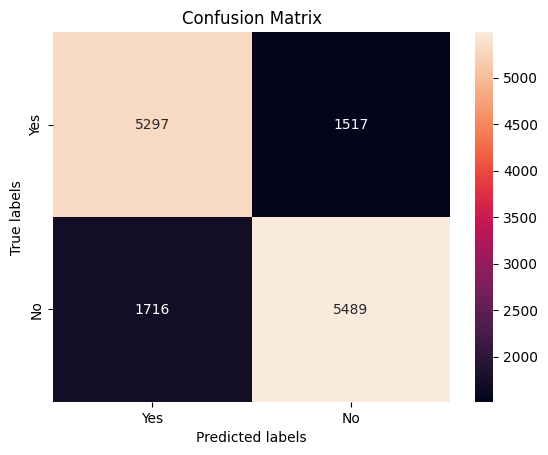

In [419]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_Predicted, Y_test)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['Yes', 'No']);

# **RandomForestClassifier**

In [420]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=75)
rfc.fit(X_train_scaled, Y_train)

RandomForestClassifier(n_estimators=75)

In [421]:
Y_Predicted = rfc.predict(X_test_scaled)
rfc_acc = metrics.accuracy_score(Y_test, Y_Predicted)
rfc_prec = metrics.precision_score(Y_test, Y_Predicted)
rfc_rec = metrics.recall_score(Y_test, Y_Predicted)
print("Accuracy:", rfc_acc)
print("Precision:", rfc_prec)
print("Recall:", rfc_rec)

Accuracy: 0.8472073614380483
Precision: 0.8602962962962963
Recall: 0.8288609763060234


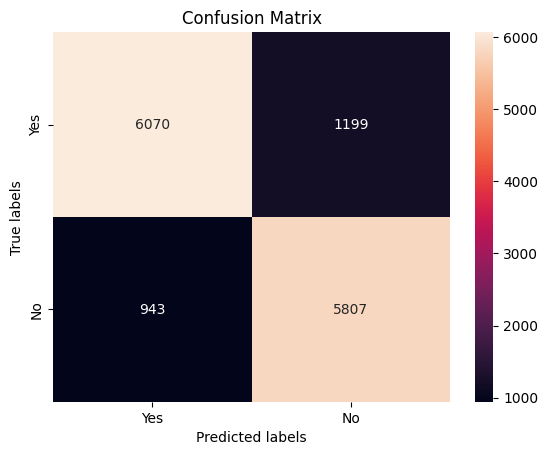

In [422]:
matrix= confusion_matrix(Y_Predicted, Y_test)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['Yes', 'No']);

# **AdaBoostClassifier**

In [423]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [424]:
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=1)
adaboost_model.fit(X_train_scaled, Y_train)

adaboost_pred = adaboost_model.predict(X_test_scaled)


adaboost_accuracy = accuracy_score(Y_test, adaboost_pred)
print("Adaboost Accuracy:", adaboost_accuracy)

adaboost_precision = precision_score(Y_test, adaboost_pred)
print("Adaboost Precision:", adaboost_precision)

adaboost_recall = recall_score(Y_test, adaboost_pred)
print("Adaboost Recall:", adaboost_recall)

Adaboost Accuracy: 0.7789428632570083
Adaboost Precision: 0.807589356006928
Adaboost Recall: 0.7320867827576363


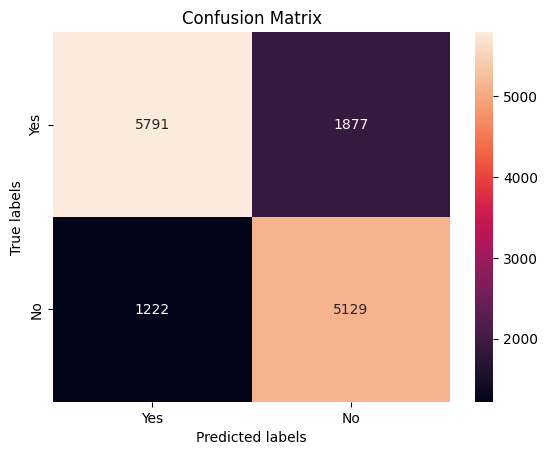

In [425]:
matrix= confusion_matrix(adaboost_pred, Y_test)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['Yes', 'No']);

# **XGBClassifier**

In [426]:
# XGBoost
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train_scaled, Y_train)

# XGBoost
xgboost_pred = xgboost_model.predict(X_test_scaled)

xgboost_accuracy = accuracy_score(Y_test, xgboost_pred)
print("XGBoost Accuracy:", xgboost_accuracy)

xgboost_precision = precision_score(Y_test, xgboost_pred)
print("xgboost Precision:", xgboost_precision)

xgboost_recall = recall_score(Y_test, xgboost_pred)
print("xgboost Recall:", xgboost_recall)

XGBoost Accuracy: 0.8303730651259006
xgboost Precision: 0.857429718875502
xgboost Recall: 0.7923208678275764


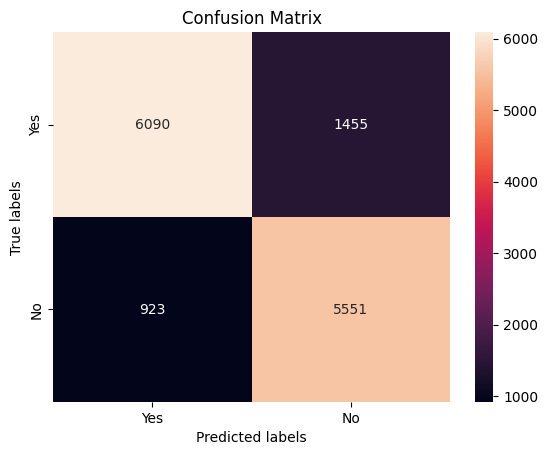

In [427]:
matrix= confusion_matrix(xgboost_pred, Y_test)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['Yes', 'No']);

# **Models Evaluation comparison**

Precision and Recall Comparison

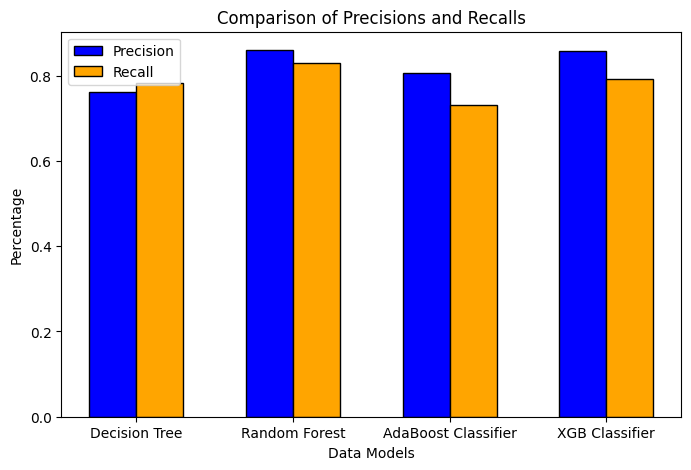

In [438]:
prec = [dt_prec,rfc_prec,adaboost_precision,xgboost_precision]
rec = [dt_rec,rfc_rec,adaboost_recall,xgboost_recall ]
plt.figure(figsize=(8, 5))
n=4
r = np.arange(4)
width = 0.3
plt.bar(r, prec, color = 'b', width = width, edgecolor = 'black', label='Precision')
plt.bar(r + width, rec, color = 'orange', width = width, edgecolor = 'black', label='Recall')

plt.xlabel("Data Models")
plt.ylabel("Percentage")
plt.title("Comparison of Precisions and Recalls")

plt.xticks(r + width/2,['Decision Tree','Random Forest','AdaBoost Classifier','XGB Classifier'])
plt.legend()
plt.show()

Prediction Accuracy Comparison

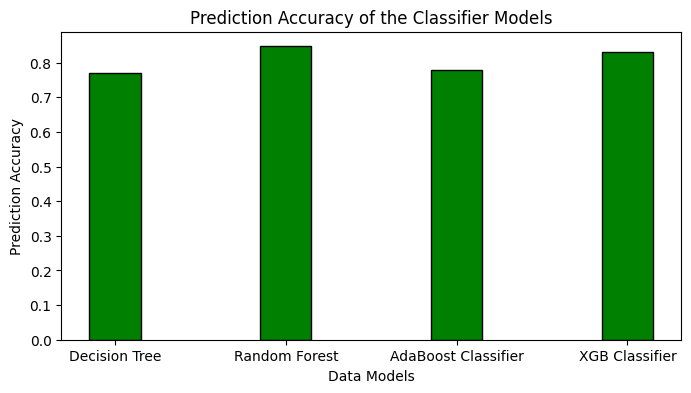

In [437]:
acc = {}
acc["Decision Tree"] = dt_acc
acc["Random Forest"] = rfc_acc
acc["AdaBoost Classifier"] = adaboost_accuracy
acc["XGB Classifier"] = xgboost_accuracy

models = list(acc.keys())
values = list(acc.values())

plt.figure(figsize=(8, 4))
# creating the bar plot
plt.bar(models, values, color='green', edgecolor = 'black', width=0.3)
plt.xlabel("Data Models")
plt.ylabel("Prediction Accuracy")
plt.title("Prediction Accuracy of the Classifier Models")
plt.show()